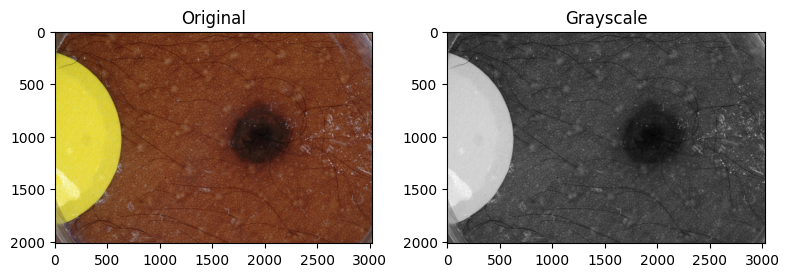

In [1]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray
from skimage.io import imread


## GRAYSCALE 

original = imread("ISIC_2019/ISIC_0003728.jpg")
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage.io import imread
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

## Méthode dilatation

image = img_as_float(grayscale)
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

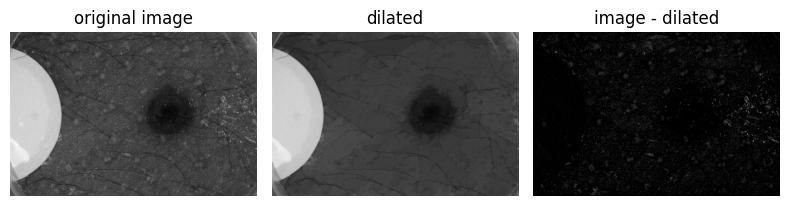

In [3]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

L'algorithme n'est pas optimal pour la base de données utilisée et ne permet pas de récupérer le mélanome.

In [ ]:
########### CHAN-VESE SEGMENTATION ###################

import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese
from skimage.io import imread
from skimage.color import rgb2gray


image = imread("ISIC_2019/ISIC_0000013.jpg")
grayscale = rgb2gray(image)
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(grayscale, mu=0.1, lambda1=1, lambda2=1, tol=1e-3,
               max_num_iter=200, dt=0.5, init_level_set="checkerboard",
               extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(grayscale, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

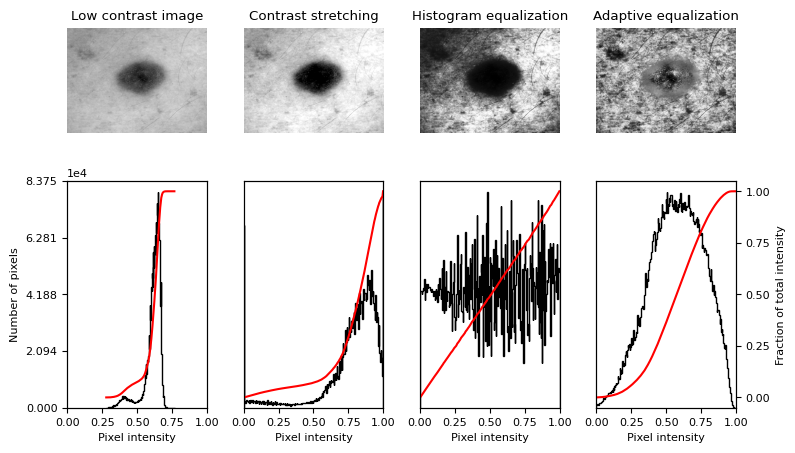

In [68]:
############# HISTOGRAM EQUALIZATION #############

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure
from skimage.io import imread


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = imread("ISIC_2019/ISIC_0000092.jpg")
img = rgb2gray(img)

# Contrast stretching
p1, p2 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p1, p2))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()


/var/folders/yj/nl9n2kvn3p34twpwg51rc2n80000gn/T/ipykernel_78088/1870820994.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


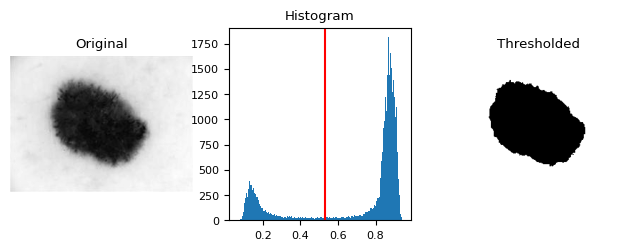

In [73]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.io import imread
from skimage.color import rgb2gray

### THRESHOLD ###


image = imread("ISIC_2019/ISIC_0000013.jpeg")
print()
image = rgb2gray(image)
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

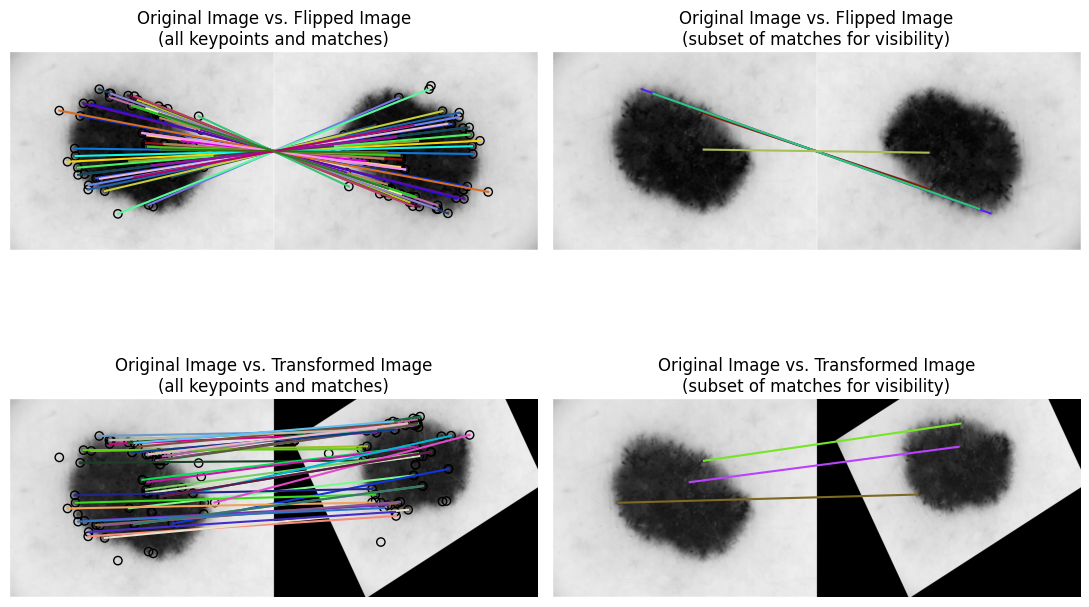

In [1]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT
from skimage.io import imread

### PERMET DE RAPPROCHER DEUX IMAGES ###


img1 = imread("ISIC_2019/ISIC_0000013.jpg")
img1 = rgb2gray(img1)
img2 = transform.rotate(img1, 180)
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                                  translation=(0, -200))
img3 = transform.warp(img1, tform)

descriptor_extractor = SIFT()

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, max_ratio=0.6,
                              cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, max_ratio=0.6,
                              cross_check=True)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))

plt.gray()

plot_matches(ax[0, 0], img1, img2, keypoints1, keypoints2, matches12)
ax[0, 0].axis('off')
ax[0, 0].set_title("Original Image vs. Flipped Image\n"
                   "(all keypoints and matches)")

plot_matches(ax[1, 0], img1, img3, keypoints1, keypoints3, matches13)
ax[1, 0].axis('off')
ax[1, 0].set_title("Original Image vs. Transformed Image\n"
                   "(all keypoints and matches)")

plot_matches(ax[0, 1], img1, img2, keypoints1, keypoints2, matches12[::15],
             only_matches=True)
ax[0, 1].axis('off')
ax[0, 1].set_title("Original Image vs. Flipped Image\n"
                   "(subset of matches for visibility)")

plot_matches(ax[1, 1], img1, img3, keypoints1, keypoints3, matches13[::15],
             only_matches=True)
ax[1, 1].axis('off')
ax[1, 1].set_title("Original Image vs. Transformed Image\n"
                   "(subset of matches for visibility)")

plt.tight_layout()
plt.show()

In [27]:
from brisque import BRISQUE
from skimage.io import imread  

## TEST DE LA MÉTHODE BRISQUE
brisq = BRISQUE()
img = imread("ISIC_2019/ISIC_000043.jpg")
brisq.score(img)

38.71567871970487

In [37]:
import cv2
import numpy as np

### ÉVALUE SI UNE IMAGE EST FLOUE (NE MARCHE PAS BIEN) ###


def estimate_blur(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return blur_var

def is_blurred(image, threshold=100):
    blur_var = estimate_blur(image)
    print(blur_var)
    return blur_var < threshold

# Example usage:
image_path = "ISIC_2019/ISIC_0003728.jpg"
image = cv2.imread(image_path)
is_blur = is_blurred(image)

if is_blur:
    print("Image is blurred.")
else:
    print("Image is sharp.")

29.50564859165761
Image is blurred.


In [58]:
from heic2png import HEIC2PNG

## CONVERTIR HEIC EN PNG ##

if __name__ == '__main__':
    heic_img = HEIC2PNG('ISIC_2019/IMG_8550.HEIC')
    heic_img.save() # it'll show as `test.png`

In [2]:
import os
import sys

from PIL import Image
import numpy as np

### COMPRESSION DES K-MEANS ###

def initialize_K_centroids(X, K):
    """ Choose K points from X at random """
    m = len(X)
    return X[np.random.choice(m, K, replace=False), :]


def find_closest_centroids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    for i in range(m):
        # Find distances
        distances = np.linalg.norm(X[i] - centroids, axis=1)

        # Assign closest cluster to c[i]
        c[i] = np.argmin(distances)

    return c

def compute_means(X, idx, K):
    _, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        examples = X[np.where(idx == k)]
        mean = [np.mean(column) for column in examples.T]
        centroids[k] = mean
    return centroids

def find_k_means(X, K, max_iters=30):
    centroids = initialize_K_centroids(X, K)
    previous_centroids = centroids
    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_means(X, idx, K)
        if (centroids == previous_centroids).all():
            # The centroids aren't moving anymore.
            return centroids
        else:
            previous_centroids = centroids

    return centroids, idx

try:
    image_path = "ISIC_2019/IMG_8550.png"
    assert os.path.isfile(image_path)
except (IndexError, AssertionError):
    print('Please specify an image')

def load_image(path):
    """ Load image from path. Return a numpy array """
    image = Image.open(path)
    return np.asarray(image) / 255

image = load_image(image_path)
w, h, d = image.shape
print('Image found with width: {}, height: {}, depth: {}'.format(w, h, d))

X = image.reshape((w * h, d))
K = 7 # the desired number of colors in the compressed image (Paramètre à choisir)

colors, _ = find_k_means(X, K, max_iters=10)

idx = find_closest_centroids(X, colors)

idx = np.array(idx, dtype=np.uint8)
X_reconstructed = np.array(colors[idx, :] * 255, dtype=np.uint8).reshape((w, h, d))
compressed_image = Image.fromarray(X_reconstructed)

compressed_image.save('ISIC_out.png')


Image found with width: 3024, height: 4032, depth: 3
